# Redes Neurais Artificiais 2025.1

- **Disciplina**: Redes Neurais Artificiais 2025.1
- **Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
- **Github**: http://github.com/elloa  
        

Levando em conta a base de dados **_Forest Cover Type_**, esta parte do Projeto Prático diz respeito à proposição e avaliação de múltiplas redes neurais artificiais do tipo feedforward multilayer perceptron para o problema da classificação multi-classe da cobertura florestal em uma área do Roosevelt National Forest.

## Busca em Grade

Uma maneira padrão de escolher os parâmetros de um modelo de Machine Learning é por meio de uma busca em grade via força bruta. O algoritmo da busca em grade é dado como segue:

1. Escolha a métrica de desempenho que você deseja maximizar  
2. Escolha o algoritmo de Machine Learning (exemplo: redes neurais artificiais). Em seguida, defina os parâmetros ou hiperparâmetros deste tipo de modelo sobre os quais você dseja otimizar (número de épocas, taxa de aprendizado, etc.) e construa um array de valores a serem testados para cada parâmetro ou hiperparâmetro.  
3. Defina a grade de busca, a qual é dada como o produto cartesiano de cada parâmetro a ser testado. Por exemplo, para os arrays [50, 100, 1000] e [10, 15], tem-se que a grade é [(50,10), (50,15), (100,10), (100,15), (1000,10), (1000,15)].
4. Para cada combinação de parâmetros a serem otimizados, utilize o conjunto de treinamento para realizar uma validação cruzada (holdout ou k-fold) e calcule a métrica de avaliação no conjunto de teste (ou conjuntos de teste)
5. Escolha a combinação de parâmetros que maximizam a métrica de avaliação. Este é o modelo otimizado.

Por que esta abordagem funciona? Porque a busca em grade efetua uma pesquisa extensiva sobre as possíveis combinações de valores para cada um dos parâmetros a serem ajustados. Para cada combinação, ela estima a performance do modelo em dados novos. Por fim, o modelo com melhor métrica de desempenho é escolhido. Tem-se então que este modelo é o que melhor pode vir a generalizar mediante dados nunca antes vistos.

## Efetuando a Busca em Grade sobre Hiperparâmetros das Top-6 RNAs

Considerando a etapa anterior do projeto prático, foram identificadas pelo menos 6 melhores Redes Neurais para o problema da classificação multi-classe da cobertura florestal no conjunto de dados selecionado. Algumas destas redes possuem atributos categóricos como variáveis preditoras, enquanto outras possuem apenas os atributos numéricos como preditores.

A primeira etapa desta segunda parte do projeto consiste em trazer para este notebook estas seis arquiteturas, ressaltando:

1. Número de neurônios ocultos por camada  
2. Função de Ativação  
3. Utilização ou não de atributos categóricos   
4. Desempenho médio +- desvio padrão nos testes anteriores  
5. Número de repetições que a equipe conseguiu realizar para verificar os resultados  

Elabore uma busca em grade sobre estas arquiteturas que contemple variações nos hiperparâmetros a seguir, conforme documentação de [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

A. Solver  (Não usar o LBFGS, pois é mais adequado para datasets pequenos)  
B. Batch Size  
C. Learning Rate Init  
D. Paciência (n_iter_no_change)  
E. Épocas  

Nesta busca em grande, contemple a utilização do objeto [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [89]:
import pandas as pd
import joblib
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from prettytable import PrettyTable
import matplotlib.pyplot as plt

In [90]:
# 1 - Trazendo as redes da parte 2:
table = PrettyTable()

table.field_names = ["Rede","N. de Neurônios Ocultos por Camada", "Função de Ativação","Solver","N. Épocas", "Atributos Categóricos", "Desempenho Médio", "Número de repetições"]
table.add_row(["1","(20,20)", "relu", "adam", 200, "Não", "Acurácia = 0.7700 | F1-score =  0.7653", 100])
table.add_row(["2","(20,20)", "logistic", "adam", 200,"Não", "Acurácia = 0.7699 | F1-score =  0.7647", 100])
table.add_row(["3","(20,20)", "relu", "adam", 150,"Não", "Acurácia = 0.7686 | F1-score =  0.7641", 100])

table.add_row(["4","(20,20)", "logistic", "adam", 200,"Sim", "Acurácia = 0.7658 ± 0.0026, F1-Score = 0.7601 ± 0.0028", 100])
table.add_row(["5","(20,20)", "relu", "adam", 150,"Sim", "Acurácia = 0.7467 ± 0.0048, F1-Score = 0.7400 ± 0.0060", 100])
table.add_row(["6","(20,20)", "relu", "adam", 200, "Sim", "Acurácia = 0.7452 ± 0.0059, F1-Score = 0.7387 ± 0.0069", 100])

table.add_row(["7","(4,)", "relu", "adam", 100, "Sim", "Acurácia = 0.6984 ± 0.0033, F1-Score = 0.6819 ± 0.0051", 100])
table.add_row(["8","(4,)", "relu", "adam", 100, "Não", "Acurácia = 0.6979 | F1-score =  0.6793", 100])
table.add_row(["9","(4,)", "relu", "adam", 200,"Sim", "Acurácia = 0.6978 ± 0.0039, F1-Score = 0.6804 ± 0.0065", 100])

table.add_row(["10","(4,)", "relu", "adam", 200,"Não", "Acurácia = 0.6977 | F1-score =  0.6791", 100])
table.add_row(["11","(4,)", "relu", "sgd", 200,"Não", "Acurácia = 0.6972 | F1-score =  0.6768", 100])
table.add_row(["12","(4,)", "relu", "sgd", 200,"Sim", "Acurácia = 0.6845 ± 0.0405, F1-Score = 0.6566 ± 0.0692", 100])
print(table)

+------+------------------------------------+--------------------+--------+-----------+-----------------------+--------------------------------------------------------+----------------------+
| Rede | N. de Neurônios Ocultos por Camada | Função de Ativação | Solver | N. Épocas | Atributos Categóricos |                    Desempenho Médio                    | Número de repetições |
+------+------------------------------------+--------------------+--------+-----------+-----------------------+--------------------------------------------------------+----------------------+
|  1   |              (20,20)               |        relu        |  adam  |    200    |          Não          |         Acurácia = 0.7700 | F1-score =  0.7653         |         100          |
|  2   |              (20,20)               |      logistic      |  adam  |    200    |          Não          |         Acurácia = 0.7699 | F1-score =  0.7647         |         100          |
|  3   |              (20,20)           

## Validação Cruzada k-fold

Na elaboração da busca em grid, vamos avaliar os modelos propostos segundo uma estratégia de validação cruzada ainda não explorada até o momento: a validação cruzada k-fold. Segundo a mesma, o conjunto de dados é particionado em k partes: a cada iteração, separa-se uma das partes para teste e o modelo é treinado com as k-1 partes remanescentes. Valores sugestivos de k na literatura são k = 3, 5 ou 10, pois o custo computacional desta validação dos modelos é alto. A métrica de desempenho é resultante da média dos desempenhos nas k iterações. A figura a seguir ilustra a ideia desta avaliação

<img src = "https://ethen8181.github.io/machine-learning/model_selection/img/kfolds.png" width=600></img>

Considerando a métrica de desempenho F1-Score, considere a validação cruzada 5-fold para aferir os resultados da busca em grande anterior.

In [91]:
# Carregando os dados
df = pd.read_csv("covtype.csv")
X = df.drop("Cover_Type", axis=1)
y = df["Cover_Type"]

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# Pipeline com normalização + RNA
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPClassifier(early_stopping=True))
])

In [92]:
# Grade de parâmetros e hiperparâmetros
# Nas nossas redes, os números de neurônios nas camadas ocultas são: (20,20), (4,) com funções de ativação 'relu' e 'logistic'
param_grid = {
    "mlp__hidden_layer_sizes": [(20,20), (4,)],
    "mlp__activation": ["relu", "logistic"],
    "mlp__solver": ["adam", "sgd"],
    "mlp__learning_rate_init": [0.001, 0.01],
    "mlp__batch_size": [32, 64],
    "mlp__n_iter_no_change": [5, 10],
    "mlp__max_iter": [100, 200]
}

# Busca em grade com validação cruzada
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring="f1_weighted",
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('mlp',
                                        MLPClassifier(early_stopping=True))]),
             n_jobs=-1,
             param_grid={'mlp__activation': ['relu', 'logistic'],
                         'mlp__batch_size': [32, 64],
                         'mlp__hidden_layer_sizes': [(20, 20), (4,)],
                         'mlp__learning_rate_init': [0.001, 0.01],
                         'mlp__max_iter': [100, 200],
                         'mlp__n_iter_no_change': [5, 10],
                         'mlp__solver': ['adam', 'sgd']},
             scoring='f1_weighted', verbose=2)

In [93]:
results = pd.DataFrame(grid.cv_results_)
results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_mlp__activation,param_mlp__batch_size,param_mlp__hidden_layer_sizes,param_mlp__learning_rate_init,param_mlp__max_iter,param_mlp__n_iter_no_change,param_mlp__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,158.787267,38.253951,0.281761,0.108005,relu,32,"(20, 20)",0.001,100,5,adam,"{'mlp__activation': 'relu', 'mlp__batch_size':...",0.811402,0.805892,0.810680,0.806187,0.810396,0.808912,0.002370,33
1,184.135558,40.252117,0.202025,0.018656,relu,32,"(20, 20)",0.001,100,5,sgd,"{'mlp__activation': 'relu', 'mlp__batch_size':...",0.808798,0.812490,0.803643,0.812430,0.804760,0.808424,0.003715,35
2,223.895178,39.478238,0.206849,0.033414,relu,32,"(20, 20)",0.001,100,10,adam,"{'mlp__activation': 'relu', 'mlp__batch_size':...",0.817529,0.811490,0.818527,0.810805,0.817376,0.815145,0.003295,16
3,285.358332,60.898757,0.183740,0.013555,relu,32,"(20, 20)",0.001,100,10,sgd,"{'mlp__activation': 'relu', 'mlp__batch_size':...",0.810983,0.809358,0.811692,0.813668,0.812662,0.811673,0.001469,21
4,151.920072,40.469337,0.129027,0.013879,relu,32,"(20, 20)",0.001,200,5,adam,"{'mlp__activation': 'relu', 'mlp__batch_size':...",0.801477,0.814146,0.811659,0.809330,0.806254,0.808573,0.004402,34


## Identificando a melhor solução

Como resultado da busca em grande com validação cruzada 5-fold, identifique o modelo otimizado com melhor desempenho para o problema. Apresente claramente este modelo, seus parâmetros, hiperparâmetros otimizados e resultados para cada um dos folds avaliados. Esta é a melhor solução identificada em decorrência deste projeto

In [94]:
# Resultados da melhor solução
best_solution_idx = grid.best_index_
print("Parâmetros:")
print("Função de Ativação: " + results['param_mlp__activation'][best_solution_idx])
print("Número de neurônios ocultos por camada: " + str(results['param_mlp__hidden_layer_sizes'][best_solution_idx]))

print("\nHiperparâmetros:")
print("Solver: " + results['param_mlp__solver'][best_solution_idx])
print("Batch Size: " + str(results['param_mlp__batch_size'][best_solution_idx]))
print("Learning Rate Init: " + str(results['param_mlp__learning_rate_init'][best_solution_idx]))
print("Paciência: " + str(results['param_mlp__n_iter_no_change'][best_solution_idx]))
print("Épocas: " + str(results['param_mlp__max_iter'][best_solution_idx]))

print("\nResultados por fold:")
for i in range(5):
    fold_score = results[f'split{i}_test_score'][best_solution_idx]
    print(f"Fold {i+1}: {fold_score:.4f}")

print(f"\nF1-score médio (validação cruzada): {results['mean_test_score'][best_solution_idx]:.4f}")
print(f"Desvio padrão: {results['std_test_score'][best_solution_idx]:.4f}")


Parâmetros:
Função de Ativação: logistic
Número de neurônios ocultos por camada: (20, 20)

Hiperparâmetros:
Solver: sgd
Batch Size: 32
Learning Rate Init: 0.01
Paciência: 10
Épocas: 200

Resultados por fold:
Fold 1: 0.8299
Fold 2: 0.8285
Fold 3: 0.8302
Fold 4: 0.8232
Fold 5: 0.8212

F1-score médio (validação cruzada): 0.8266
Desvio padrão: 0.0037


## Empacotando a solução

Suponha que você deve entregar este classificador ao órgão responsável por administrar o Roosevelt National Park. Para tanto, você deve fazer uma preparação do mesmo para utilização neste cenário. Uma vez que já identificou os melhores parâmetros e hiperparâmetros, o passo remanescente consiste em treinar o modelo com estes valores e todos os dados disponíveis, salvando o conjunto de pesos do modelo ao final para entrega ao cliente. Assim, finalize o projeto prático realizando tais passos.

1. Consulte a documentação a seguir:
https://scikit-learn.org/stable/modules/model_persistence.html  
2. Treine o modelo com todos os dados  
3. Salve o modelo em disco  
4. Construa uma rotina que recupere o modelo em disco  
5. Mostre que a rotina é funcional, fazendo previsões com todos os elementos do dataset e exibindo uma matriz de confusão das mesmas

In [96]:
#2 Treinar o Modelo Com todos os Dados
params_best_model = {
    'activation': results['param_mlp__activation'][best_solution_idx],
    'hidden_layer_sizes': results['param_mlp__hidden_layer_sizes'][best_solution_idx],
    'solver': results['param_mlp__solver'][best_solution_idx],
    'learning_rate_init': results['param_mlp__learning_rate_init'][best_solution_idx],
    'n_iter_no_change': results['param_mlp__n_iter_no_change'][best_solution_idx],
    'batch_size': results['param_mlp__batch_size'][best_solution_idx],
    'max_iter': results['param_mlp__max_iter'][best_solution_idx]
}

final_model = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPClassifier(**params_best_model))
])

# Treina com todos os dados
final_model.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('mlp',
                 MLPClassifier(activation='logistic', batch_size=32,
                               hidden_layer_sizes=(20, 20),
                               learning_rate_init=0.01, solver='sgd'))])

In [97]:
#3 Salvando o modelo no disco
joblib.dump(final_model, "roosevelt_solution.pkl")

['roosevelt_solution.pkl']

In [98]:
#4 Rotina para recuperar o modelo do disco
def retrieve_model(archive = "roosevelt_solution.pkl"): #Por default, o nome do arquivo que será buscado será roosevelt_solution.pkl
    retrieved_model = joblib.load(archive)
    return retrieved_model

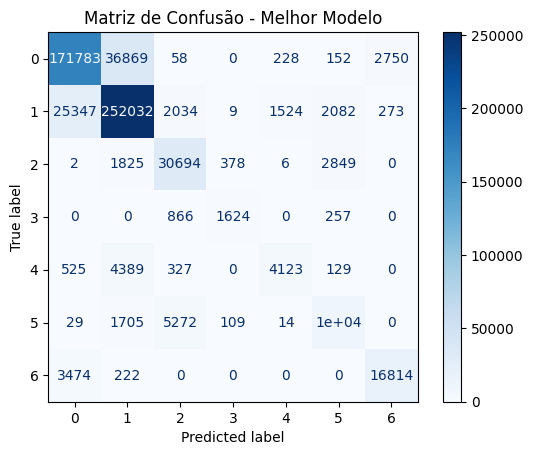

In [99]:
#5 Previsões com todos os dados
retrieved_model = retrieve_model()
y_pred = retrieved_model.predict(X)

# Matriz de confusão
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusão - Melhor Modelo")
plt.show()